In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Librerías :

In [0]:
import tensorflow as tf
from tensorflow import keras
import os
import sys
import cv2 as cv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tqdm import tqdm
%matplotlib inline

## Data Analysis:


In [4]:
classes={0:'Safe Driving'
         ,1:'texting - right'
         ,2:'talking on the phone - right'
         ,3:'texting - left'
         ,4:'talking on the phone - left'
         ,5:'operating the radio'
         ,6:'drinking'
         ,7:'reaching behind'
         ,8:'hair and makeup'
         ,9:'talking to passenger'}
data1 = pd.read_csv('/content/drive/My Drive/proyectoCV/driver_imgs_list.csv')
for j in np.unique(data1["classname"]):
    print ("clase :",j,"Numero de ejemplares:",np.count_nonzero(data1["classname"][data1.classname==j]))

('clase :', 'c0', 'Numero de ejemplares:', 2489)
('clase :', 'c1', 'Numero de ejemplares:', 2267)
('clase :', 'c2', 'Numero de ejemplares:', 2317)
('clase :', 'c3', 'Numero de ejemplares:', 2346)
('clase :', 'c4', 'Numero de ejemplares:', 2326)
('clase :', 'c5', 'Numero de ejemplares:', 2312)
('clase :', 'c6', 'Numero de ejemplares:', 2325)
('clase :', 'c7', 'Numero de ejemplares:', 2002)
('clase :', 'c8', 'Numero de ejemplares:', 1911)
('clase :', 'c9', 'Numero de ejemplares:', 2129)


## Dataset Creation:

In [5]:
path_images='/content/drive/My Drive/proyectoCV/train/'
#size=20000
X=[]
y=[]
for i in tqdm(np.unique(data1["classname"])):
    #for j in np.random.choice(data1["img"][data1.classname==i],size):
    for j in data1["img"][data1.classname==i]:
        #print(path_images+i+"/"+j)
        temp_image=cv.cvtColor(cv.imread(path_images+i+"/"+j), cv.COLOR_BGR2RGB)
        X.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
        y.append(int(i[-1]))
        
c = list(zip(X, y))

random.shuffle(c)

X,y = zip(*c)   

X=np.array(X)
y=np.array(y)

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,shuffle=1)



X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255
#data1 = pd.read_csv('../files/driver_imgs_list.csv')

#for j in np.unique(data1["classname"]):
#    print "clase :",j,"Numero de ejemplares:",np.count_nonzero(data1["classname"][data1.classname==j])

100%|██████████| 10/10 [1:58:11<00:00, 651.93s/it]


In [7]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

((17939, 64, 64, 3), (4485, 64, 64, 3), (17939,), (4485,))


In [8]:
data1.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


## DNN model definition:

### <span style="color:orange"> Model 1</span>:

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[64, 64, 3]),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               6291968   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 6,425,866
Trainable params: 6,425,866
Non-trainable params: 0
_________________________________________________________________


$Fitting:$

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train, epochs=10, batch_size=160, verbose=2,validation_data=(X_test, y_test))

Train on 17939 samples, validate on 4485 samples
Epoch 1/10
17939/17939 - 1s - loss: 2.3389 - acc: 0.3589 - val_loss: 1.2738 - val_acc: 0.6685
Epoch 2/10
17939/17939 - 1s - loss: 0.9521 - acc: 0.7388 - val_loss: 0.6639 - val_acc: 0.8011
Epoch 3/10
17939/17939 - 1s - loss: 0.4437 - acc: 0.8988 - val_loss: 0.2805 - val_acc: 0.9456
Epoch 4/10
17939/17939 - 1s - loss: 0.2306 - acc: 0.9507 - val_loss: 0.1773 - val_acc: 0.9666
Epoch 5/10
17939/17939 - 1s - loss: 0.1403 - acc: 0.9717 - val_loss: 0.1151 - val_acc: 0.9730
Epoch 6/10
17939/17939 - 1s - loss: 0.0910 - acc: 0.9808 - val_loss: 0.1020 - val_acc: 0.9739
Epoch 7/10
17939/17939 - 1s - loss: 0.0662 - acc: 0.9873 - val_loss: 0.0778 - val_acc: 0.9822
Epoch 8/10
17939/17939 - 1s - loss: 0.0476 - acc: 0.9908 - val_loss: 0.1359 - val_acc: 0.9579
Epoch 9/10
17939/17939 - 1s - loss: 0.0650 - acc: 0.9836 - val_loss: 0.0622 - val_acc: 0.9853
Epoch 10/10
17939/17939 - 1s - loss: 0.0309 - acc: 0.9939 - val_loss: 0.0668 - val_acc: 0.9819


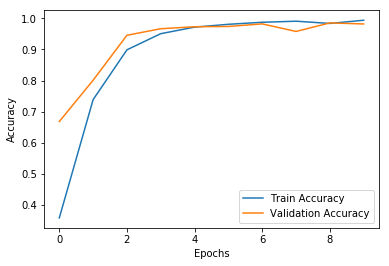

In [20]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Model 2

In [0]:
model2 = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[64, 64, 3]),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [22]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               6291968   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 6,822,410
Trainable params: 6,822,410
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model2.fit(X_train,y_train, epochs=10, batch_size=160, verbose=2,validation_data=(X_test, y_test))

Train on 17939 samples, validate on 4485 samples
Epoch 1/10
17939/17939 - 1s - loss: 2.0578 - acc: 0.3531 - val_loss: 1.0531 - val_acc: 0.6272
Epoch 2/10
17939/17939 - 1s - loss: 0.5779 - acc: 0.8198 - val_loss: 0.2850 - val_acc: 0.9173
Epoch 3/10
17939/17939 - 1s - loss: 0.2053 - acc: 0.9391 - val_loss: 0.2252 - val_acc: 0.9273
Epoch 4/10
17939/17939 - 1s - loss: 0.1540 - acc: 0.9538 - val_loss: 0.4895 - val_acc: 0.8225
Epoch 5/10
17939/17939 - 1s - loss: 0.1006 - acc: 0.9688 - val_loss: 0.5105 - val_acc: 0.8595
Epoch 6/10
17939/17939 - 1s - loss: 0.1588 - acc: 0.9505 - val_loss: 0.1235 - val_acc: 0.9592
Epoch 7/10
17939/17939 - 1s - loss: 0.0700 - acc: 0.9779 - val_loss: 0.0765 - val_acc: 0.9779
Epoch 8/10
17939/17939 - 1s - loss: 0.0649 - acc: 0.9795 - val_loss: 0.1629 - val_acc: 0.9378
Epoch 9/10
17939/17939 - 1s - loss: 0.0420 - acc: 0.9863 - val_loss: 0.1418 - val_acc: 0.9559
Epoch 10/10
17939/17939 - 1s - loss: 0.0496 - acc: 0.9832 - val_loss: 0.0782 - val_acc: 0.9761


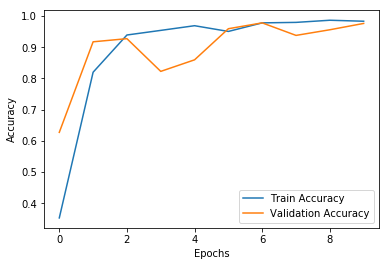

In [25]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Model 3

In [0]:
model3 = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[64, 64, 3]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.softmax)
])

In [56]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               1572992   
_________________________________________________________________
dense_28 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_29 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              525312    
Total params: 2,262,912
Trainable params: 2,262,912
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
history = model3.fit(X_train,y_train, epochs=10, batch_size=160, verbose=2,validation_data=(X_test, y_test))

Train on 17939 samples, validate on 4485 samples
Epoch 1/10
17939/17939 - 1s - loss: 1.8414 - acc: 0.3934 - val_loss: 0.8989 - val_acc: 0.6892
Epoch 2/10
17939/17939 - 1s - loss: 0.5192 - acc: 0.8356 - val_loss: 0.5111 - val_acc: 0.8312
Epoch 3/10
17939/17939 - 1s - loss: 0.2202 - acc: 0.9351 - val_loss: 0.4157 - val_acc: 0.8571
Epoch 4/10
17939/17939 - 1s - loss: 0.1597 - acc: 0.9493 - val_loss: 0.2370 - val_acc: 0.9302
Epoch 5/10
17939/17939 - 1s - loss: 0.0961 - acc: 0.9700 - val_loss: 0.0928 - val_acc: 0.9715
Epoch 6/10
17939/17939 - 1s - loss: 0.0749 - acc: 0.9750 - val_loss: 0.1734 - val_acc: 0.9396
Epoch 7/10
17939/17939 - 1s - loss: 0.0786 - acc: 0.9753 - val_loss: 0.0910 - val_acc: 0.9746
Epoch 8/10
17939/17939 - 1s - loss: 0.0526 - acc: 0.9828 - val_loss: 0.0618 - val_acc: 0.9810
Epoch 9/10
17939/17939 - 1s - loss: 0.0193 - acc: 0.9948 - val_loss: 0.0559 - val_acc: 0.9855
Epoch 10/10
17939/17939 - 1s - loss: 0.0441 - acc: 0.9852 - val_loss: 0.1273 - val_acc: 0.9632


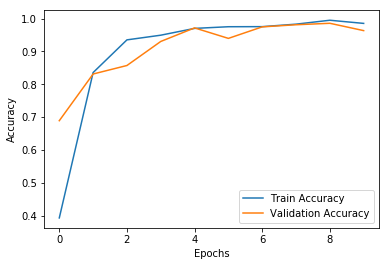

In [59]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Model 4

In [0]:
model4 = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[64, 64, 3]),
    keras.layers.Dense(400, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [36]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 400)               4915600   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                4010      
Total params: 4,919,610
Trainable params: 4,919,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model4.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model4.fit(X_train,y_train, epochs=10, batch_size=160, verbose=2,validation_data=(X_test, y_test))

Train on 17939 samples, validate on 4485 samples
Epoch 1/10
17939/17939 - 1s - loss: 2.4814 - acc: 0.4359 - val_loss: 1.1436 - val_acc: 0.6818
Epoch 2/10
17939/17939 - 1s - loss: 0.8921 - acc: 0.7872 - val_loss: 0.6492 - val_acc: 0.8722
Epoch 3/10
17939/17939 - 1s - loss: 0.5306 - acc: 0.8970 - val_loss: 0.4033 - val_acc: 0.9304
Epoch 4/10
17939/17939 - 1s - loss: 0.3289 - acc: 0.9456 - val_loss: 0.3033 - val_acc: 0.9438
Epoch 5/10
17939/17939 - 1s - loss: 0.2258 - acc: 0.9648 - val_loss: 0.2566 - val_acc: 0.9369
Epoch 6/10
17939/17939 - 1s - loss: 0.1637 - acc: 0.9735 - val_loss: 0.1671 - val_acc: 0.9695
Epoch 7/10
17939/17939 - 1s - loss: 0.1248 - acc: 0.9805 - val_loss: 0.1215 - val_acc: 0.9790
Epoch 8/10
17939/17939 - 1s - loss: 0.0970 - acc: 0.9867 - val_loss: 0.1275 - val_acc: 0.9712
Epoch 9/10
17939/17939 - 1s - loss: 0.0787 - acc: 0.9893 - val_loss: 0.0928 - val_acc: 0.9795
Epoch 10/10
17939/17939 - 1s - loss: 0.0598 - acc: 0.9926 - val_loss: 0.0822 - val_acc: 0.9853


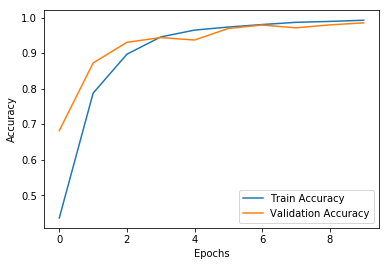

In [39]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Model 5

In [0]:
model5 = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[64, 64, 3]),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [41]:
model5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                122890    
Total params: 122,890
Trainable params: 122,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
model5.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
history = model5.fit(X_train,y_train, epochs=10, batch_size=160, verbose=2,validation_data=(X_test, y_test))

Train on 17939 samples, validate on 4485 samples
Epoch 1/10
17939/17939 - 1s - loss: 1.6567 - acc: 0.5083 - val_loss: 0.8985 - val_acc: 0.7886
Epoch 2/10
17939/17939 - 1s - loss: 0.6932 - acc: 0.8650 - val_loss: 0.5424 - val_acc: 0.8952
Epoch 3/10
17939/17939 - 1s - loss: 0.4325 - acc: 0.9291 - val_loss: 0.4060 - val_acc: 0.9072
Epoch 4/10
17939/17939 - 1s - loss: 0.3099 - acc: 0.9546 - val_loss: 0.2764 - val_acc: 0.9616
Epoch 5/10
17939/17939 - 1s - loss: 0.2280 - acc: 0.9687 - val_loss: 0.2221 - val_acc: 0.9666
Epoch 6/10
17939/17939 - 1s - loss: 0.1861 - acc: 0.9765 - val_loss: 0.1850 - val_acc: 0.9730
Epoch 7/10
17939/17939 - 1s - loss: 0.1564 - acc: 0.9796 - val_loss: 0.1688 - val_acc: 0.9724
Epoch 8/10
17939/17939 - 1s - loss: 0.1240 - acc: 0.9862 - val_loss: 0.1446 - val_acc: 0.9773
Epoch 9/10
17939/17939 - 1s - loss: 0.1105 - acc: 0.9868 - val_loss: 0.1239 - val_acc: 0.9808
Epoch 10/10
17939/17939 - 1s - loss: 0.0929 - acc: 0.9905 - val_loss: 0.1087 - val_acc: 0.9844


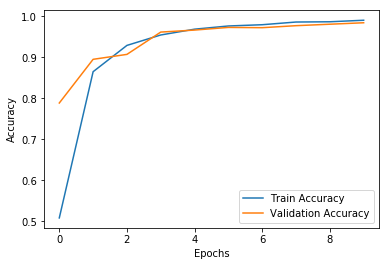

In [44]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()